# KNN - CASE I

# LIBS

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# KNN

In [2]:
#dataset load
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
# checking values == 0
df_copy = df.copy()

# replacing == np.nan
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
df_copy.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

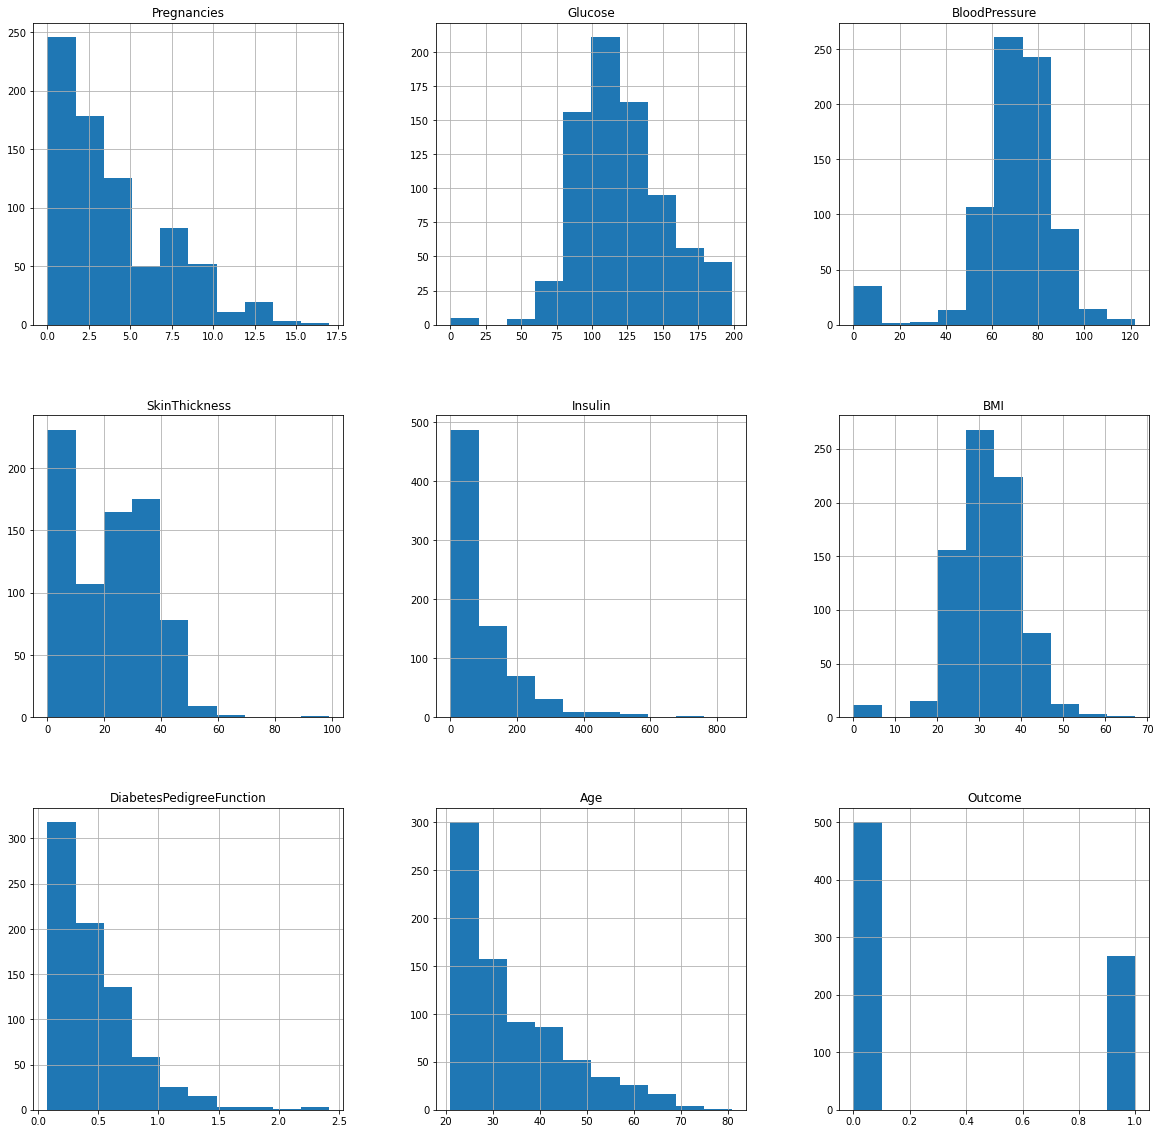

In [6]:
## distribution
p = df.hist(figsize = (20,20))

In [7]:
# removing nan values
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

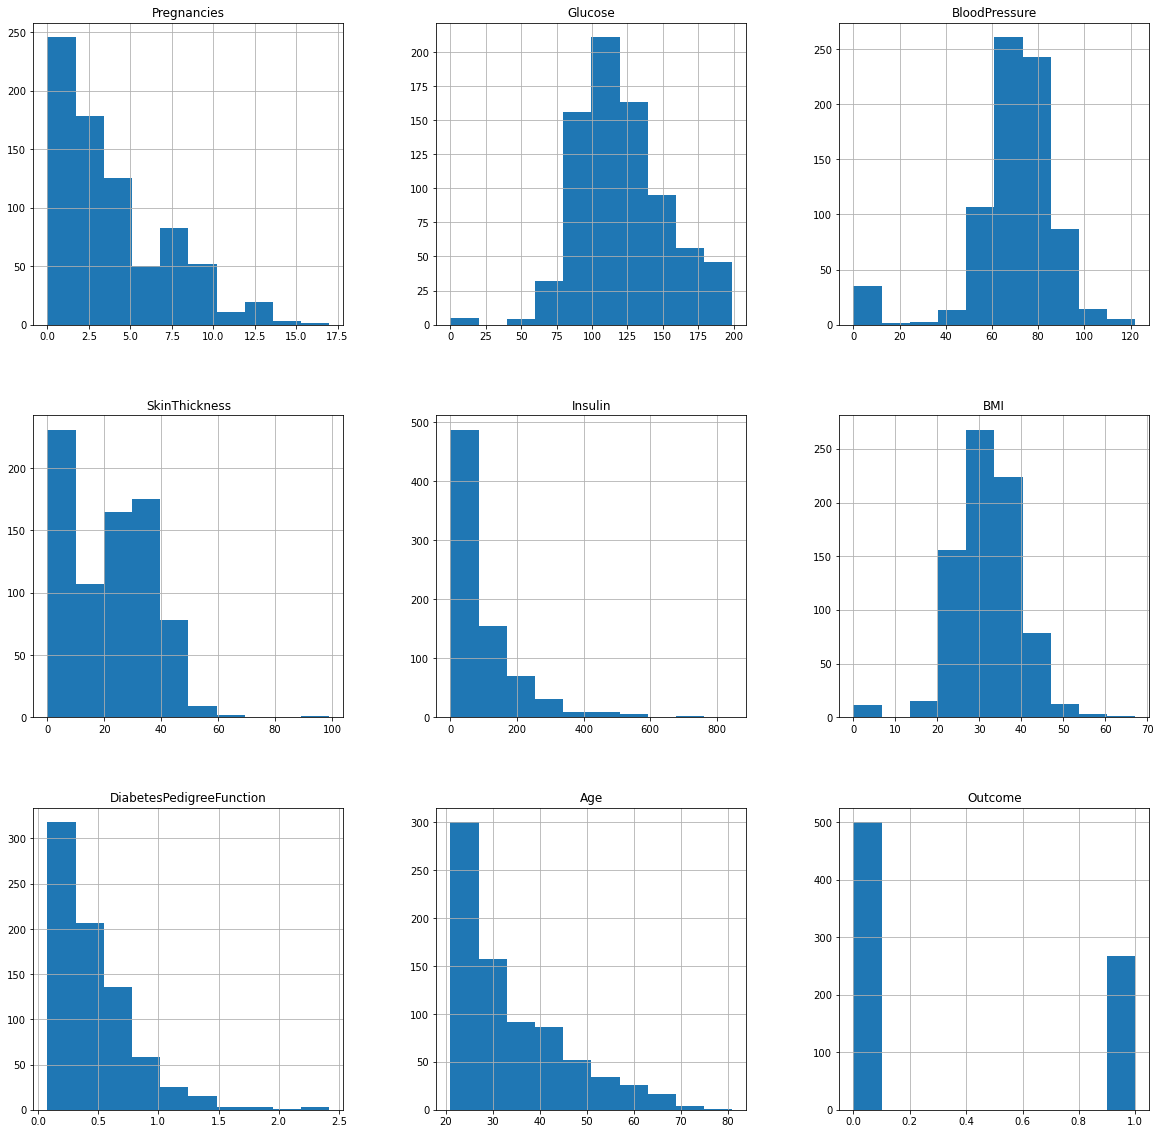

In [8]:
# plotting
p = df.hist(figsize = (20,20))

In [10]:
# scaling data
ss = StandardScaler()
X =  pd.DataFrame(ss.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [13]:
y = df_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 42,
                                                   stratify = y)

In [18]:
test_score = []
train_score = []

for i in range(1, 15):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [19]:
train_score

[1.0,
 0.8435754189944135,
 0.8621973929236499,
 0.8305400372439479,
 0.8286778398510242,
 0.8044692737430168,
 0.8100558659217877,
 0.8081936685288641,
 0.8044692737430168,
 0.8063314711359404,
 0.7988826815642458,
 0.7932960893854749,
 0.7932960893854749,
 0.7970204841713222]

In [20]:
test_score

[0.7229437229437229,
 0.7272727272727273,
 0.7489177489177489,
 0.7489177489177489,
 0.7489177489177489,
 0.7359307359307359,
 0.7316017316017316,
 0.7402597402597403,
 0.7272727272727273,
 0.7316017316017316,
 0.7532467532467533,
 0.7316017316017316,
 0.7402597402597403,
 0.7316017316017316]

In [21]:
# checking train score
max_train_score = max(train_score)
train_score_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_score_ind))))


Max train score 100.0 % and k = [1]


In [23]:
# checking test score
max_test_score = max(test_score)
test_score_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_ind))))

Max test score 75.32467532467533 % and k = [11]


/Users/daianeklein/opt/anaconda3/envs/Mack-mineracao_dados/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/daianeklein/opt/anaconda3/envs/Mack-mineracao_dados/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

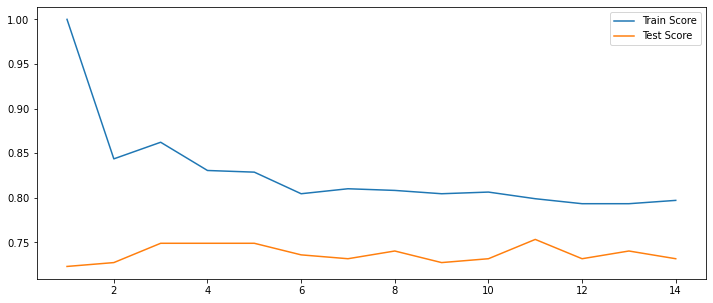

In [27]:
# result visualization
plt.figure(figsize = (12, 5))
sns.lineplot(range(1, 15), train_score, label = 'Train Score')
sns.lineplot(range(1, 15), test_score, label = 'Test Score')

In [28]:
## setting k == 11
knn = KNeighborsClassifier(11)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7532467532467533

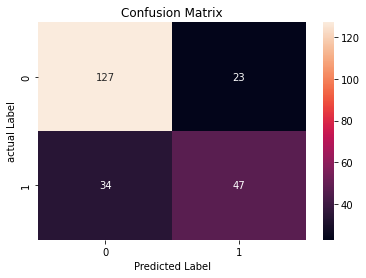

In [40]:
# matrix
y_pred = knn.predict(X_test)
knn_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(knn_matrix, annot = True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('actual Label')
plt.xlabel('Predicted Label');
